In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data_A = pd.read_csv("current_csv_files/data_A.csv")
data_B = pd.read_csv("current_csv_files/data_B.csv")
data_C = pd.read_csv("current_csv_files/data_C.csv")

data_A['A'] = 1
data_A['B'] = 0
data_A['C'] = 0

data_B['A'] = 0
data_B['B'] = 1
data_B['C'] = 0

data_C['A'] = 0
data_C['B'] = 0
data_C['C'] = 1

In [31]:
test_A = pd.read_csv("current_csv_files/test_A.csv")
test_B = pd.read_csv("current_csv_files/test_B.csv")
test_C = pd.read_csv("current_csv_files/test_C.csv")

test_A['A'] = 1
test_A['B'] = 0
test_A['C'] = 0

test_B['A'] = 0
test_B['B'] = 1
test_B['C'] = 0

test_C['A'] = 0
test_C['B'] = 0
test_C['C'] = 1

In [32]:
data_ALL = pd.concat([data_A, data_B, data_C], ignore_index=True)
test_ALL = pd.concat([test_A, test_B, test_C], ignore_index=True)

In [33]:
data_ALL1 = data_ALL.drop(['month', 'week_number'], axis='columns')
test_ALL1 = test_ALL.drop(['month', 'week_number', 'date_calc'], axis='columns')

In [34]:
# Convert 'date_forecast' to datetime
data_ALL1['date_forecast'] = pd.to_datetime(data_ALL1['date_forecast'])

# Extract year, month, and day
data_ALL1['year'] = data_ALL1['date_forecast'].dt.year
data_ALL1['month'] = data_ALL1['date_forecast'].dt.month
data_ALL1['day'] = data_ALL1['date_forecast'].dt.day

# Display the dataframe to confirm the new columns
data_ALL1[['date_forecast', 'year', 'month', 'day']].head()


,date_forecast,year,month,day
0,2019-06-02 22:00:00,2019,6,2
1,2019-06-02 23:00:00,2019,6,2
2,2019-06-03 00:00:00,2019,6,3
3,2019-06-03 01:00:00,2019,6,3
4,2019-06-03 02:00:00,2019,6,3


In [35]:
# Convert 'date_forecast' to datetime
test_ALL1['date_forecast'] = pd.to_datetime(test_ALL1['date_forecast'])

# Extract year, month, and day
test_ALL1['year'] = test_ALL1['date_forecast'].dt.year
test_ALL1['month'] = test_ALL1['date_forecast'].dt.month
test_ALL1['day'] = test_ALL1['date_forecast'].dt.day

# Display the dataframe to confirm the new columns
test_ALL1[['date_forecast', 'year', 'month', 'day']].head()

,date_forecast,year,month,day
0,2023-05-01 00:00:00,2023,5,1
1,2023-05-01 01:00:00,2023,5,1
2,2023-05-01 02:00:00,2023,5,1
3,2023-05-01 03:00:00,2023,5,1
4,2023-05-01 04:00:00,2023,5,1


In [36]:
data_ALL1['year'] = data_ALL1['year'] - 2019
test_ALL1['year'] = test_ALL1['year'] - 2019

In [37]:
data_ALL1 = data_ALL1.sort_values(by=['date_forecast', 'A', 'B', 'C'], ascending=[True, False, False, False])
test_ALL1 = test_ALL1.sort_values(by=['date_forecast', 'A', 'B', 'C'], ascending=[True, False, False, False])

In [38]:
data_ALL1.to_csv("current_csv_files/data_ALL.csv", index=False)
test_ALL1.to_csv("current_csv_files/test_ALL.csv", index=False)

/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_15689/2236386998.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ALL1A_est =data_ALL1A[data_ALL1['est'] == 1]


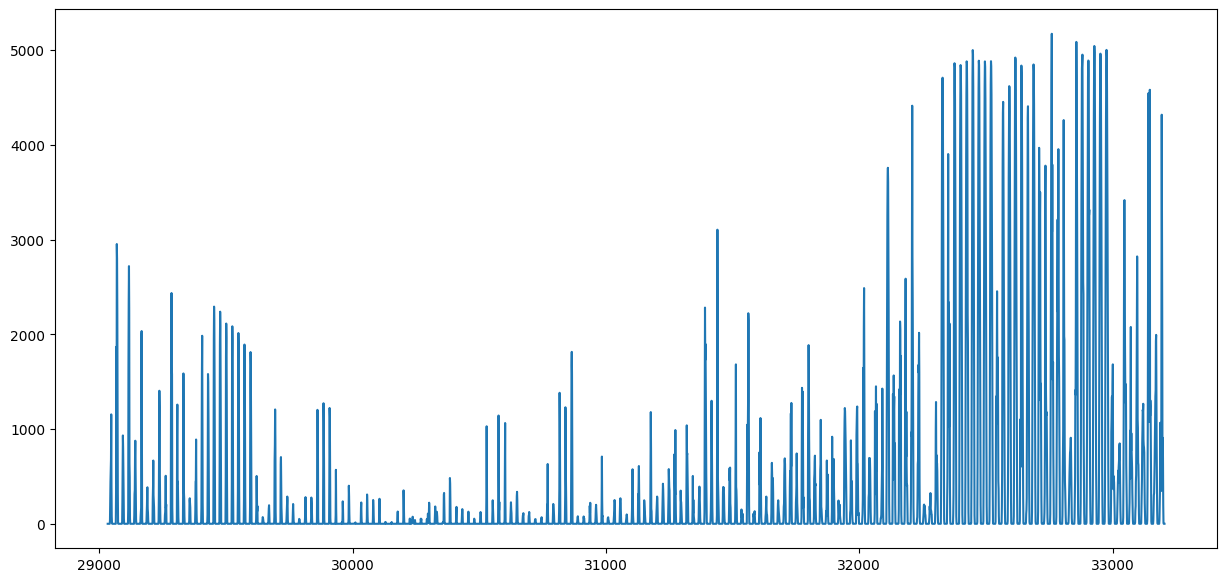

In [39]:
data_ALL1A = data_ALL1[data_ALL1['A'] == 1]
data_ALL1A_est =data_ALL1A[data_ALL1['est'] == 1]

plt.figure(figsize=(15, 7))
plt.plot(data_ALL1A_est.index, data_ALL1A_est["target"])